# Chest X-ray Pneumonia classification
 

In [ ]:

#run this if drive not mounted USE teamenel645@gmail.com account
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


## 1) Downloading Kaggle data to drive

In [ ]:
#DONT RUN AGAIN
# ! pip install -q kaggle
# from google.colab import files
# files.upload()


In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
#Changing permision to use my token to access kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! mkdir MyDrive/MyDrive/ENEL-645/data

In [ ]:
# ! kaggle datasets list
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
# ! unzip chest-xray-pneumonia.zip -d MyDrive/MyDrive/ENEL-645/data

## 2) Loading data into numpy array from drive

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import glob
import matplotlib.pyplot as plt
from skimage import transform


In [ ]:
#Loading test data
#DONT Run unless you want to re size
# data_dir_test='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/test/'
# images_test = np.asarray(glob.glob(data_dir_test + "/*/*.jpeg",recursive=True))
# labels_test = np.asarray([f.split("/")[-2] for f in images_test])



In [ ]:
#Loading train data
# #DONT Run unless you want to re size
# data_dir_train='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/train/'
# images_train = np.asarray(glob.glob(data_dir_train + "/*/*.jpeg",recursive=True))
# labels_train = np.asarray([f.split("/")[-2] for f in images_train])

In [ ]:
#Loading val data
#DONT Run unless you want to re size
# data_dir_val='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/val/'
# images_val = np.asarray(glob.glob(data_dir_val + "/*/*.jpeg",recursive=True))
# labels_val = np.asarray([f.split("/")[-2] for f in images_val])

In [ ]:
#Shuffling data
#DONT Run unless you want to re size
# from sklearn.utils import shuffle
# X_test,y_test = shuffle(images_test, labels_test, random_state=0)
# X_train,y_train = shuffle(images_train, labels_train, random_state=0)
# X_val,y_val = shuffle(images_val, labels_val, random_state=0)

In [ ]:
# plt.figure(figsize = (20,20))
# for i in range(30):
#   plt.subplot(5,6,i+1) 
#   n=plt.imread(X_test[i])
#   plt.imshow(n,cmap="gray")
#   plt.title(y_test[i])
# plt.show

## 3) Pre-Processing


### 3.1) Resizing 

In [ ]:
# Resizing 
#DONT RUN UNLESS YOU WANT TO RE-SIZE
# from skimage import transform
# from skimage import io
# img_height = 180
# img_width = 180
# #test data
# X_resized_test = np.zeros((len(X_test),img_height,img_width,1))
# for (ii,img) in enumerate(X_test):
#     X_resized_test[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #train data
# X_resized_train = np.zeros((len(X_train),img_height,img_width,1))
# for (ii,img) in enumerate(X_train):
#     X_resized_train[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #val data
# X_resized_val = np.zeros((len(X_val),img_height,img_width,1))
# for (ii,img) in enumerate(X_val):
#     X_resized_val[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))

In [ ]:
#Saving np arrays so we dont have to re-run the sizing again
#DONT RUN UNLESS YOU CHANGED THE SIZING
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test',X_resized_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test_label',y_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train',X_resized_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train_label',y_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val',X_resized_val)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val_label',y_val)

In [ ]:
#Loading np arrays
Xtest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test.npy')
ytest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test_label.npy')
Xtrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train.npy')
ytrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train_label.npy')
Xval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val.npy')
yval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val_label.npy')

In [ ]:
#Resplitting the train-val data to hav 70/30 ratio
Xtrain_val=np.vstack((Xtrain_actual,Xval_actual))
Ytrain_val=np.concatenate((ytrain_actual,yval_actual))
Xtrain_val.shape

(5232, 180, 180, 1)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain_val,Ytrain_val,test_size=0.3,shuffle=True,stratify=Ytrain_val)

<function matplotlib.pyplot.show>

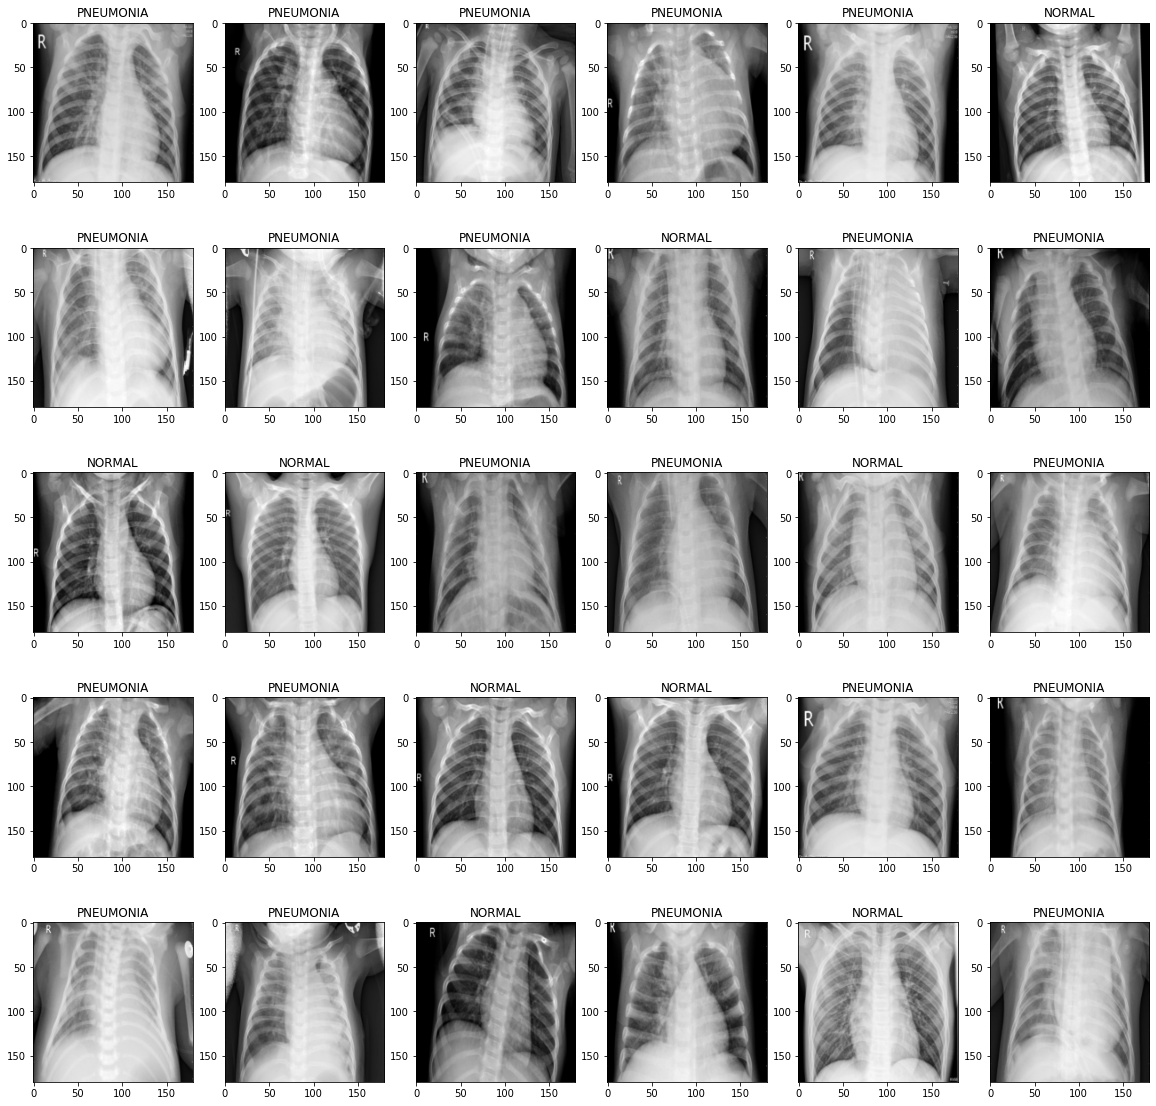

In [ ]:
#Sample of resized data
##Imshow can either do 2d or RGM numpy arrays so i had to reshape inorder to display
b=Xtest.reshape(624,180,180)
plt.figure(figsize = (20,20))
for i in range(30):
  plt.subplot(5,6,i+1) 
  plt.imshow(b[i],cmap="gray")
  plt.title(ytest[i])
plt.show

### 3.2) Data scaling

In [ ]:
# The data seems to be already scale dbetween 0 and 1, so we do nothing
print(Xtrain.min(),Xtrain.max(),Xtrain.mean(),Xtrain.std())
print(Xval.min(),Xval.max(),Xval.mean(),Xval.std())

0.0 1.0 0.4792479949676933 0.235633511764672
0.0 1.0 0.47779267988601415 0.23506265821613742


### 3.3) One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
##Converting labels to numbers
le=LabelEncoder()
le.fit(ytrain)
classes_names=[]
print("Label Encoding:\n1 is for label: ",le.inverse_transform([1]),"\n0 is for label: ",le.inverse_transform([0]))
ytrain_le=le.transform(ytrain)
ytest_le=le.transform(ytest)
yval_le=le.transform(yval)
##One hot encoding
Y_train_oh = to_categorical(ytrain_le)
Y_val_oh = to_categorical(yval_le)
Y_test_oh = to_categorical(ytest_le)
Y_test_oh[5]


Label Encoding:
1 is for label:  ['PNEUMONIA'] 
0 is for label:  ['NORMAL']


array([1., 0.], dtype=float32)

### 3.4) Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
batch_size = 32
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
              "cval": 0}
train_gen = ImageDataGenerator(**gen_params)
val_gen = ImageDataGenerator(**gen_params)
X_train_expanded=np.expand_dims(Xtrain,axis=3)
train_gen.fit(Xtrain,seed = 1)
val_gen.fit(Xval, seed = 1)

train_flow = train_gen.flow(Xtrain,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(Xval,Y_val_oh,batch_size = batch_size) 


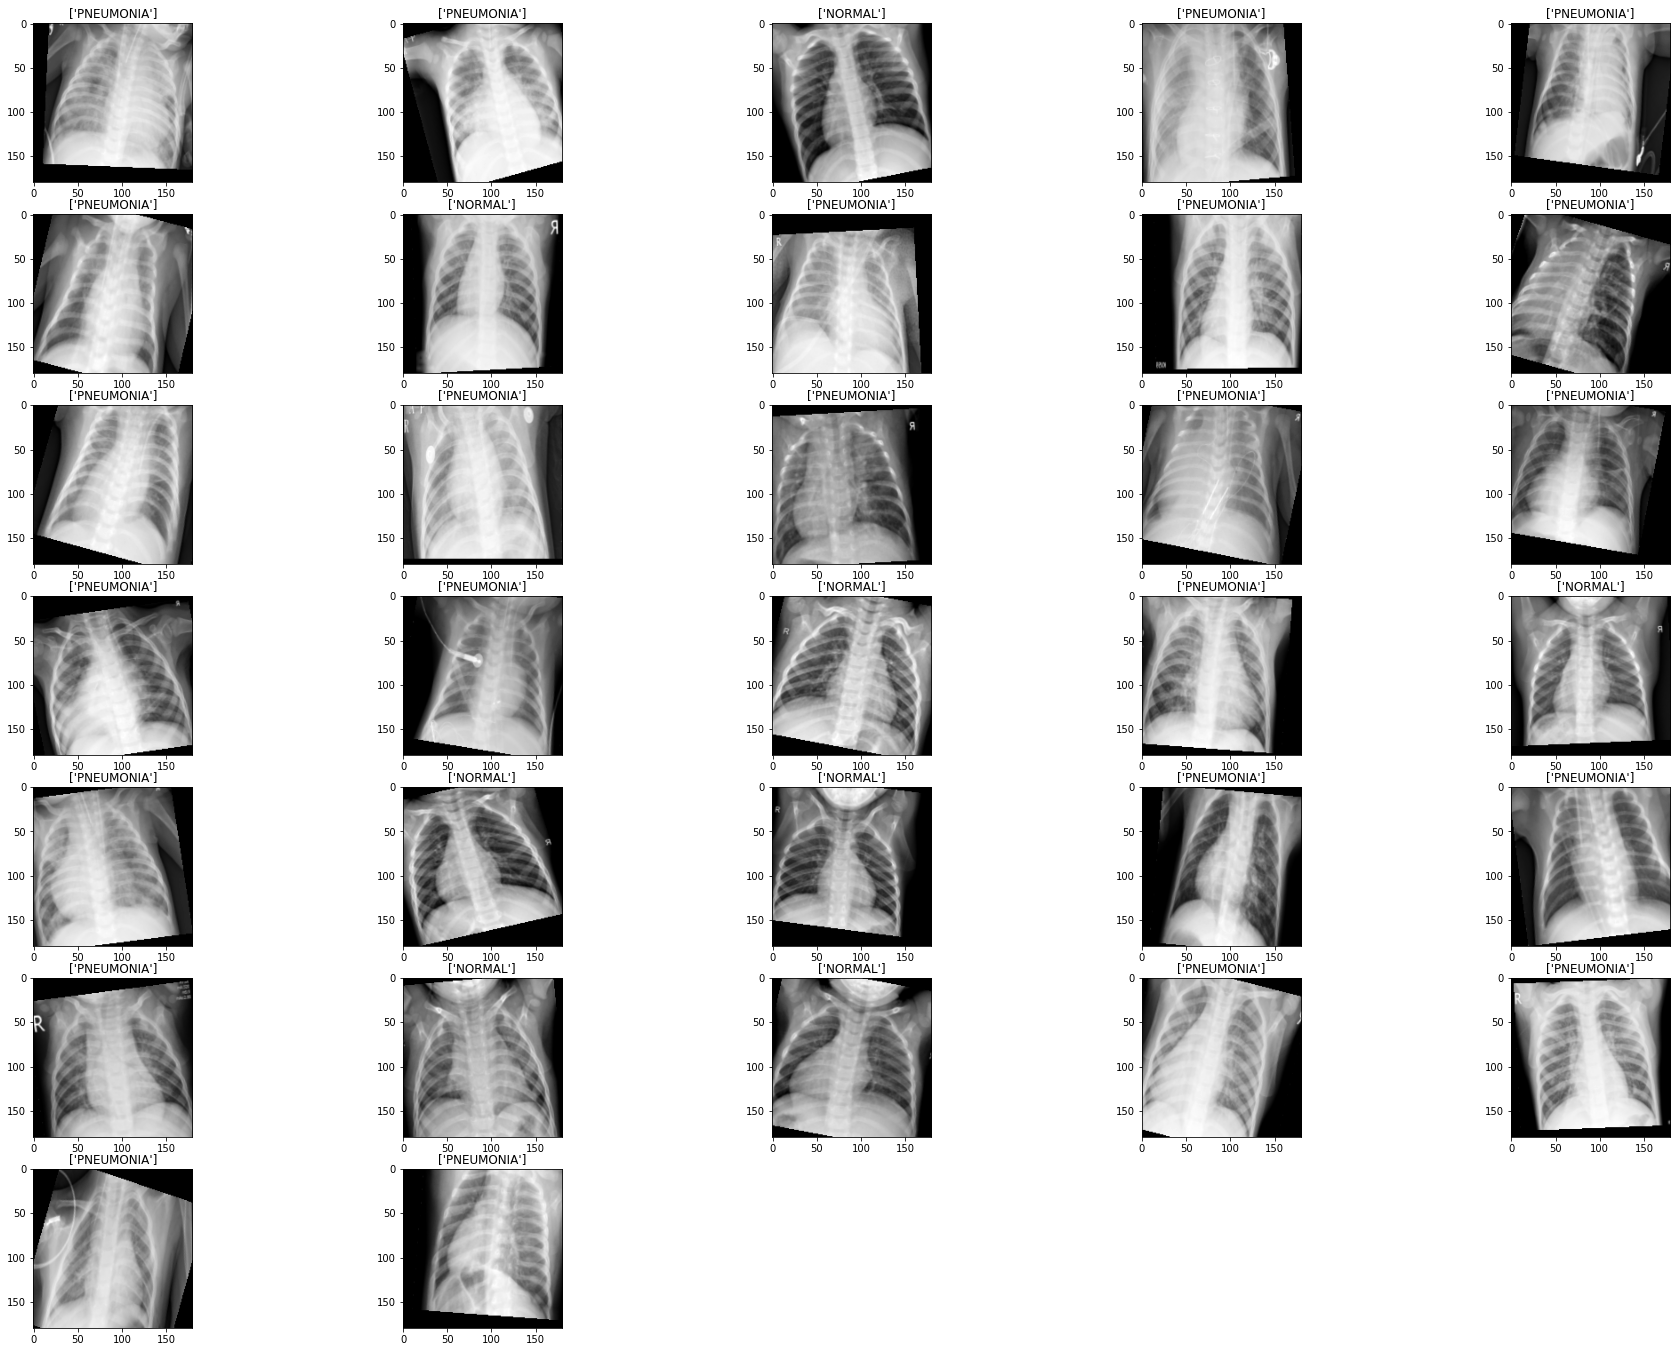

In [ ]:
#Displaying sample of Augmented data
Xbatch,Ybatch = train_flow.__getitem__(0)
plt.figure(figsize = (32,24))
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    temp=Xbatch[ii].reshape(180,180)#dropping the channel axis
    plt.imshow(temp, cmap = "gray")
    plt.title(le.inverse_transform([int(Ybatch[ii].argmax())]))#using inverse of the label encoder to find the label
plt.show()

## 4) Defining Callbacks


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ZeroPadding2D
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

In [ ]:
model_name_cnn = "MyDrive/MyDrive/ENEL-645/models/team_8_CNN0_001.h5"

# define your callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)
monitor = tf.keras.callbacks.ModelCheckpoint(model_name_cnn, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch%5 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0) # was verbose 0

## 5) Models

### 5.1) Johns model 

#### 5.1.1) Def 

In [ ]:
# BEST MODEL

def my_model_cnn(ishape = (180,180,1), k = 2, lr = 0.0001):

    ## VGG-16 Model Minus 1 Convolution + ReLu Layer
    # Achieved an 80.93% accuracy in another notebook, and will be ran again in this notebook below
    model = Sequential()

    model.add(ZeroPadding2D((1, 1), input_shape=ishape))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3)))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy"])
    
    return model

In [ ]:
model_cnn = my_model_cnn()
print(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 182, 182, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 64)      0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 182, 182, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 180, 180, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 64)        0

#### 5.1.2) Train 

In [ ]:
# train your model - decide for how many epochs
model_cnn.fit(x=train_flow, batch_size = 32, epochs = 100, verbose = 1, callbacks= [early_stop, monitor, lr_schedule], validation_data=(val_flow))
#model_cnn.fit(Xtrain,Y_train_oh, batch_size = 32, epochs = 100, verbose = 1, callbacks= [early_stop, monitor, lr_schedule], validation_data = (Xval,Y_val_oh))



Epoch 1/100
115/115 [==============================] - 86s 409ms/step - loss: 0.5999 - accuracy: 0.7334 - val_loss: 0.5251 - val_accuracy: 0.7420
Epoch 2/100
115/115 [==============================] - 45s 389ms/step - loss: 0.4626 - accuracy: 0.7780 - val_loss: 0.3073 - val_accuracy: 0.8662
Epoch 3/100
115/115 [==============================] - 45s 391ms/step - loss: 0.2654 - accuracy: 0.8870 - val_loss: 0.2973 - val_accuracy: 0.8777
Epoch 4/100
115/115 [==============================] - 45s 393ms/step - loss: 0.2160 - accuracy: 0.9203 - val_loss: 0.1823 - val_accuracy: 0.9248
Epoch 5/100
115/115 [==============================] - 45s 392ms/step - loss: 0.2143 - accuracy: 0.9178 - val_loss: 0.1524 - val_accuracy: 0.9389
Epoch 6/100
115/115 [==============================] - 45s 394ms/step - loss: 0.1755 - accuracy: 0.9314 - val_loss: 0.1288 - val_accuracy: 0.9465
Epoch 7/100
115/115 [==============================] - 45s 394ms/step - loss: 0.1440 - accuracy: 0.9438 - val_loss: 0.1235 -

#### 5.1.3) Evaluate 

In [ ]:
# BEST MODEL = VGG16 MINUS 1 LAYER

model_cnn.load_weights(model_name_cnn)
metrics = model_cnn.evaluate(Xtest,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

20/20 [==============================] - 4s 204ms/step - loss: 0.2877 - accuracy: 0.9103
Categorical cross-entropy: 0.28767046332359314
Accuracy: 0.9102563858032227
